# Final assignment Programming 1

## Table of contents
1. [Introduction](#introduction)
2. [Data inspection](#paragraph1)
    1. [Cases dataset](#subparagraph1)
    2. [Sewagewater dataset](#subparagraph2)
    3. [Facilities dataset](#subparagraph3)
3. [Data Analysis](#paragraph2)
4. [Data Manipulation](#paragraph3)
    1. [Merging of dataframes](#subparagraph4)
5. [Visualizations](#paragraph4)
6. [Statistical Analysis](#paragraph5)
7. [Conclusion](#paragraph6)

## Introduction <a id="introduction"></a>

In this project, I am taking a look at COVID-19 data provided by the RIVM. The Jupyter Notebook contains statistical analysis, various graphs, data exploration and analysis, as well as data manipulation to ultimately answer the research question below:

**Research question:** Does the amount of virus particles in sewage water coincide with the number of positive COVID-19 cases?

**Daily COVID cases per municipality dataset:** https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv

**Sewagewater dataset:** https://data.rivm.nl/covid-19/COVID-19_rioolwaterdata.csv

**Water Treatment Facilties List:** https://www.cbs.nl/-/media/_excel/2021/39/20210930-aantal-inwoners-per-verzorgingsgebied-2021.xlsx

**Handy information:** https://www.rivm.nl/coronavirus-covid-19/onderzoek/rioolwater

**Retrieved dataset versions:** 2022-07-13 15:15

In [338]:
import pandas as pd             # version 2.0.1
import numpy as np              # version 1.24.3
import matplotlib.pyplot as plt # version 3.7.1
import seaborn as sns           # version 0.12.2

In [339]:
# loading in the data
cases = pd.read_csv('../data/COVID-19_aantallen_gemeente_per_dag.csv', sep=";")
sewagewater = pd.read_csv('../data/COVID-19_rioolwaterdata.csv', sep=";")
facilities = pd.read_excel('../data/20210930-Aantal inwoners per verzorgingsgebied 2021.xlsx', sheet_name='Tabel 1', header=0)

## Data inspection <a id="paragraph1"></a>

First we'll take a look at the structure of our datasets. The columns we have, the values they contain, the datatypes we're dealing with, the amount of entries each dataframe contains, the distribution of the values as well as the amount of missing values.

### Cases dataset <a id="subparagraph1"></a>

Description of the variables:
- **Date_of_report:** Date and time on which the database was created by RIVM. (format: yyyy-mm-dd)
- **Date_of_publication:** This concerns the number of reports per day that have newly been received by RIVM. (format: yyyy-mm-dd)
- **Municipality_code:** Municipality code. Municipality classification based on postal code of the place of residence of the SARS-CoV-2 positive person, coded according to CBS.
- **Municipality_name:** Name of the municipality.
- **Province:** Name of the province.
- **Security_region_code:** Security region code.
- **Security_region_name:** Name of the security region.
- **Municipal_health_service:** Name of the GGD.
- **ROAZ_region:** Name of the ROAZ region.
- **Total_reported:** The number of new people reported to the GGD who tested positive for SARS-CoV-2 by the RIVM on [Date_of_publication].
- **Deceased:** The number of deceased people reported to the GGDs who tested positive for SARS-CoV-2 and who were published by the RIVM on [Date_of_publication].

Metadata of the cases dataset: https://data.rivm.nl/meta/srv/eng/catalog.search;jsessionid=7E3B438E1812BD5F2AE74734A9B43230#/metadata/5f6bc429-1596-490e-8618-1ed8fd768427

In [340]:
cases.head()

,Version,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Deceased
0,5,2022-07-13 10:00:00,2020-02-28,GM0014,Groningen,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0
1,5,2022-07-13 10:00:00,2020-02-28,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0
2,5,2022-07-13 10:00:00,2020-02-28,GM0037,Stadskanaal,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0
3,5,2022-07-13 10:00:00,2020-02-28,GM0047,Veendam,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0
4,5,2022-07-13 10:00:00,2020-02-28,GM0050,Zeewolde,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0


In [341]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322524 entries, 0 to 322523
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Version                   322524 non-null  int64 
 1   Date_of_report            322524 non-null  object
 2   Date_of_publication       322524 non-null  object
 3   Municipality_code         299982 non-null  object
 4   Municipality_name         299982 non-null  object
 5   Province                  321657 non-null  object
 6   Security_region_code      320790 non-null  object
 7   Security_region_name      320790 non-null  object
 8   Municipal_health_service  321657 non-null  object
 9   ROAZ_region               316455 non-null  object
 10  Total_reported            322524 non-null  int64 
 11  Deceased                  322524 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 29.5+ MB


In [342]:
print('Shape of the dataset:', cases.shape)
print(f'Amount of missing data for each column:\n{cases.isnull().sum()}')

Shape of the dataset: (322524, 12)
Amount of missing data for each column:
Version                         0
Date_of_report                  0
Date_of_publication             0
Municipality_code           22542
Municipality_name           22542
Province                      867
Security_region_code         1734
Security_region_name         1734
Municipal_health_service      867
ROAZ_region                  6069
Total_reported                  0
Deceased                        0
dtype: int64


We can see that there are quite a lot of missing values for a couple of columns. This needs to be dealt with later.

In [343]:
cases.describe()

,Version,Total_reported,Deceased
count,322524.0,322524.000000,322524.000000
mean,5.0,25.612550,0.069493
std,0.0,101.209804,0.388860
min,5.0,0.000000,0.000000
25%,5.0,1.000000,0.000000
50%,5.0,5.000000,0.000000
75%,5.0,18.000000,0.000000
max,5.0,9436.000000,28.000000


From this information we can infer that not a lot of people are reported as being COVID postive on a daily basis (24.6 mean) and even less people are reported as having died whilst being COVID positive (0.069493 mean). The max amount of people having died on a single day is 28 while the max amount of people being reported as infected is 9436. Both columns have a minimum of 0.

### Sewagewater Dataset <a id="subparagraph2"></a>

Description of the variables:

- **Date_of_report:** Date the file was created. (format: yyyy-mm-dd)

- **Date_measurement:** Date the sampling of the 24-hour influent (raw sewage) sample started (format: yyyy-mm-dd).

- **RWZI_AWZI_code:** Code of sewage treatment plant (rioolwaterzuiveringsinstallatie, RWZI) or waste water treatment plant (afvalwaterzuiveringsinstallatie, AWZI).

- **RWZI_AWZI_name:** Name of sewage treatment plant (WWTP) or waste water treatment plant (WWTP).

- **RNA_flow_per_100000:** The average concentration of SARS-CoV-2 RNA, converted to daily sewage flow and displayed per 100,000 inhabitants.

Metadata of the sewagewater dataset: https://data.rivm.nl/meta/srv/eng/catalog.search;jsessionid=7E3B438E1812BD5F2AE74734A9B43230#/metadata/a2960b68-9d3f-4dc3-9485-600570cd52b9

In [344]:
sewagewater.head()

,Version,Date_of_report,Date_measurement,RWZI_AWZI_code,RWZI_AWZI_name,RNA_flow_per_100000
0,2,2022-07-13,2020-03-30,32002,Tilburg,34621959326395
1,2,2022-07-13,2020-03-31,3010,Assen,41199039310795
2,2,2022-07-13,2020-03-31,1033,Garmerwolde,10473596079208
3,2,2022-07-13,2020-03-31,2011,Leeuwarden,11002680177775
4,2,2022-07-13,2020-03-31,1008,Stadskanaal,3802954816430


In [345]:
sewagewater.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73374 entries, 0 to 73373
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Version              73374 non-null  int64 
 1   Date_of_report       73374 non-null  object
 2   Date_measurement     73374 non-null  object
 3   RWZI_AWZI_code       73374 non-null  int64 
 4   RWZI_AWZI_name       73374 non-null  object
 5   RNA_flow_per_100000  73374 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.4+ MB


In [346]:
print('Shape of the dataset:', sewagewater.shape)
print(f'Amount of missing data for each column:\n{sewagewater.isnull().sum()}')

Shape of the dataset: (73374, 6)
Amount of missing data for each column:
Version                0
Date_of_report         0
Date_measurement       0
RWZI_AWZI_code         0
RWZI_AWZI_name         0
RNA_flow_per_100000    0
dtype: int64


In [347]:
sewagewater.describe()

,Version,RWZI_AWZI_code,RNA_flow_per_100000
count,73374.0,73374.000000,7.337400e+04
mean,2.0,12219.974432,6.691878e+13
std,0.0,8920.988107,8.946032e+13
min,2.0,1008.000000,0.000000e+00
25%,2.0,5001.000000,1.364409e+13
50%,2.0,10029.000000,3.631592e+13
75%,2.0,17065.000000,8.813981e+13
max,2.0,33001.000000,3.957930e+15


Looking at the RNA_flow_per_100000 it's important to note that only 50% of COVID-19 positive people have virus particles in their excrement. It's still unknown how long COVID infected people will have virus particles in their excrement and how much virus particles there are in the excrement ([Source](https://www.rivm.nl/coronavirus-covid-19/onderzoek/rioolwater)). Noteworthy is that the value range of RNA_flow_per_100000 is quite large. We'll need to take this into account when making graphs later on. The minimum value being 0 is also quite strange. It would mean that from all the COVID-19 infected people on a given day there are no covid infected people who have COVID-19 particles in their excrement.

### Facilities dataset <a id="subparagraph3"></a>

- **rwzi_code:** Code of sewage treatment plant (rioolwaterzuiveringsinstallatie, RWZI).
- **rwzi_naam:** Name of sewage treatment plant (rioolwaterzuiveringsinstallatie, RWZI).
- **startdatum:** Start date (Format: yyyy-mm-dd).
- **einddatum:** End date (Format: yyyy-mm-dd).
- **inwoners:** Amount of inhabitants.
- **regio_type:** Region type.
- **regio_code:** Region code.
- **regio_naam:** Region name.
- **aandeel:** Share.
- **toelichting:** Clarification.

Link to the metadata of the dataset: https://www.cbs.nl/nl-nl/maatwerk/2021/06/inwoners-per-rioolwaterzuiveringsinstallatie-1-1-2021

In [348]:
facilities.head()

,rwzi_code,rwzi_naam,startdatum,einddatum,inwoners,regio_type,regio_code,regio_naam,aandeel,toelichting
0,1008.0,STADSKANAAL,2021-01-01,2021-09-30,31755.0,GM,GM0037,Stadskanaal,1.0,voorlopig
1,1008.0,STADSKANAAL,2021-01-01,NaT,31749.0,GM,GM0037,Stadskanaal,1.0,definitief
2,1008.0,STADSKANAAL,2021-01-01,2021-09-30,31755.0,VR,VR01,Groningen,1.0,voorlopig
3,1008.0,STADSKANAAL,2021-01-01,NaT,31749.0,VR,VR01,Groningen,1.0,definitief
4,1010.0,TER APEL,2021-01-01,2021-09-30,13363.0,GM,GM1950,Westerwolde,1.0,voorlopig


In [349]:
print('Shape of the dataset:', facilities.shape)
print(f'Amount of missing data for each column:\n{facilities.isnull().sum()}')

Shape of the dataset: (2862, 10)
Amount of missing data for each column:
rwzi_code         1
rwzi_naam         1
startdatum        2
einddatum      1570
inwoners          2
regio_type        2
regio_code        2
regio_naam        2
aandeel         359
toelichting       2
dtype: int64


In [350]:
facilities.describe()

,rwzi_code,startdatum,einddatum,inwoners,aandeel
count,2861.000000,2860,1292,2860.000000,2503.000000
mean,10314.922055,2021-01-02 06:50:20.979020800,2021-09-25 05:31:01.300309760,74386.163287,0.483817
min,-9999.000000,2021-01-01 00:00:00,2021-02-16 00:00:00,0.000000,0.000000
25%,3031.000000,2021-01-01 00:00:00,2021-09-30 00:00:00,12203.000000,0.028350
50%,10009.000000,2021-01-01 00:00:00,2021-09-30 00:00:00,35609.000000,0.370000
75%,17053.000000,2021-01-01 00:00:00,2021-09-30 00:00:00,79810.000000,0.999950
max,49999.000000,2021-06-02 00:00:00,2021-09-30 00:00:00,833281.000000,1.000000
std,11548.184724,NaN,NaN,119449.865439,0.430452


The only noteworthy columns are rwzi_code and regio_code. Luckily they don't have a lot of missing values. These columns will be used later to join the sewagewater and cases datasets. Seeing how the regio_code and rwzi_codes are distributed gives us little to no further insight.

## Data analysis <a id="paragraph2"></a>

In this chapter we'll further analyse the structure and values of the datasets, common values between datasets, amount of entries per date and intersections of the common values to get a better understanding of these datasets.

In [351]:
# get timeframe of the date column for a dataset
def get_timeframe(dataframe, column):
    timeframe_df = dataframe[column].copy()
    timeframe_df = timeframe_df.sort_values()
    return timeframe_df.iloc[0], timeframe_df.iloc[-1]

first, last = get_timeframe(cases,'Date_of_publication')

print(f'Timeframe of the cases dataframe: {first} till {last}')

first, last = get_timeframe(sewagewater,'Date_measurement')

print(f'Timeframe of the sewagewater dataframe: {first} till {last}')

Timeframe of the cases dataframe: 2020-02-28 till 2022-07-13
Timeframe of the sewagewater dataframe: 2020-03-30 till 2022-07-10


The timeframes seem to be fairly similar. After merging the dataframes we'll still have a relatively large timeframe to work with.

In [352]:
print("Amount of unique dates in the cases dataset:", len(cases['Date_of_publication'].unique()))
print("Amount of unique dates in the sewagewater dataset:", len(sewagewater['Date_measurement'].unique()))

Amount of unique dates in the cases dataset: 867
Amount of unique dates in the sewagewater dataset: 810


Now we'll look at how many data points each unique date has for both datasets.

In [353]:
cases_copy = cases.copy() # use a copy of the data frame to not alter the original

# Convert the "Date_measurement" column to datetime if it's not already in datetime format
cases_copy['Date_of_publication'] = pd.to_datetime(cases_copy['Date_of_publication'])

# Count the occurrences of each unique date
entries_per_day_cases = cases_copy['Date_of_publication'].value_counts()

entries_per_day_cases

Date_of_publication
2020-02-28    372
2021-10-02    372
2021-09-21    372
2021-09-22    372
2021-09-23    372
             ... 
2020-12-16    372
2020-12-17    372
2020-12-18    372
2020-12-19    372
2022-07-13    372
Name: count, Length: 867, dtype: int64

In [354]:
sewagewater_copy = sewagewater.copy() # use a copy of the data frame to not alter the original

# Convert the "Date_measurement" column to datetime if it's not already in datetime format
sewagewater_copy['Date_measurement'] = pd.to_datetime(sewagewater_copy['Date_measurement'])

# Count the occurrences of each unique date
entries_per_day_sewagewater = sewagewater_copy['Date_measurement'].value_counts()

entries_per_day_sewagewater

Date_measurement
2022-04-12    276
2022-02-08    273
2022-03-24    273
2022-06-02    272
2022-02-03    271
             ... 
2021-06-18      1
2020-06-19      1
2020-07-10      1
2020-07-11      1
2020-03-30      1
Name: count, Length: 810, dtype: int64

We can see that sewagewater has a lot less entries in general associated with each unique date.

In [355]:
# get the unique amount of municipality names in each data frame
municipality_count_cases_unique = cases.Municipality_name.unique()
municipality_count_sewage_unique = sewagewater.RWZI_AWZI_name.unique()

print(f'Amount of unique municipalities that have measurements = Cases: {len(municipality_count_cases_unique)}, Sewage: {len(municipality_count_sewage_unique)}')

Amount of unique municipalities that have measurements = Cases: 345, Sewage: 317


In [356]:
# get the unique amount of municipality codes in each data frame
cases_municipalities_codes = cases.Municipality_code.unique()
facilities_regio_codes = facilities.regio_code.unique()

print(f'Amount of unique municipalities codes = Cases: {len(cases_municipalities_codes)}, Sewage: {len(facilities_regio_codes)}')

Amount of unique municipalities codes = Cases: 345, Sewage: 378


In [357]:
# get the unique amount of RWZI codes in each data frame
sewage_rwzi = sewagewater['RWZI_AWZI_code'].unique()
facilities_rwzi = facilities['rwzi_code'].unique()

print(f'Amount of unique RWZI_codes that have measurements = Sewagewater : {len(sewage_rwzi)}, Facilities : {len(facilities_rwzi)}')

Amount of unique RWZI_codes that have measurements = Sewagewater : 317, Facilities : 320


We can see that the cases dataframe has a lot more measurements for each municipality (cases: 322.524, sewage: 73.374) and that the unique amount of municipalities and rwzi_codes slightly differ for each dataframe.

Next up, we'll take the intersection of the dataframes to see which municipalities and rwzi_codes are present in both.

In [358]:
# get the intersection of both dataframes
intersection_municipality_names = set(municipality_count_cases_unique) & set(municipality_count_sewage_unique)

print('Intersection count of municipality names:', len(intersection_municipality_names))
print('First few elements:', list(sorted(intersection_municipality_names))[:5])

Intersection count of municipality names: 106
First few elements: ['Aalten', 'Alblasserdam', 'Alkmaar', 'Almere', 'Ameland']


In [359]:
# Get the intersection of both dataframes
intersection_municipalities = set(cases_municipalities_codes) & set(facilities_regio_codes)

# Convert elements to a consistent datatype (e.g., string) before sorting
intersection_municipalities = sorted(str(value) for value in intersection_municipalities)

print('Intersection count of municipality codes:', len(intersection_municipalities))
print('First few elements:', intersection_municipalities[:5])

Intersection count of municipality codes: 342
First few elements: ['GM0014', 'GM0034', 'GM0037', 'GM0047', 'GM0050']


In [360]:
# get the intersection of both dataframes
intersection_RWZI_codes = set(sewage_rwzi) & set(facilities_rwzi)

print('Intersection count of rwzi codes:', len(intersection_RWZI_codes))
print('First few elements:', list(sorted(intersection_RWZI_codes))[:5])

Intersection count of rwzi codes: 315
First few elements: [1008, 1010, 1011, 1024, 1025]


We can see that after both intersections we still have a lot of common values left.

In [361]:
# Functions to check if a dataframe's date column is sorted and in what order.
def check_if_sorted(dataframe_name, dataframe_column):
    column = dataframe_name[dataframe_column]
    is_sorted_ascending = column.is_monotonic_increasing
    is_sorted_descending = column.is_monotonic_decreasing

    if is_sorted_ascending:
        print(f"The {dataframe_column} column is sorted chronologically in ascending order.")
    elif is_sorted_descending:
        print(f"The {dataframe_column} column is sorted chronologically in descending order.")
    else:
        print(f"The {dataframe_column} column is not sorted chronologically.")

# specific function to be used when the data column is the index column
def check_if_sorted_index(dataframe_name):
    column = dataframe_name.index
    is_sorted_ascending = column.is_monotonic_increasing
    is_sorted_descending = column.is_monotonic_decreasing

    if is_sorted_ascending:
        print(f"The index is sorted chronologically in ascending order.")
    elif is_sorted_descending:
        print(f"The index is sorted chronologically in descending order.")
    else:
        print(f"The index is not sorted chronologically.")


In [362]:
# function calls to see how dataframes their date columns are sorted
check_if_sorted(cases, 'Date_of_publication')
check_if_sorted(sewagewater, 'Date_measurement')

The Date_of_publication column is sorted chronologically in ascending order.
The Date_measurement column is not sorted chronologically.


## Data Manipulation <a id="paragraph3"></a>

In this chapter we'll change value types, create new dataframes, merge datasets, drop unused columns/nan values/duplicate values and calculate the rolling mean. This is done to prepare the data, so that only useable and useful data is left in the merged/new dataframes.

In [363]:
# dropping nan and empty values in each dataframe
cases.dropna(inplace=True)
sewagewater.dropna(inplace=True)
facilities.dropna(inplace=True)

In [364]:
# Changing the date value type of two columns
cases['Date_of_publication'] = pd.to_datetime(cases['Date_of_publication'])
sewagewater['Date_measurement'] = pd.to_datetime(sewagewater['Date_measurement'])

print("Data type Date_of_publication:", cases['Date_of_publication'].dtypes)
print("Data type Date_measurement:", sewagewater['Date_measurement'].dtypes)

Data type Date_of_publication: datetime64[ns]
Data type Date_measurement: datetime64[ns]


In [365]:
# Sorting values in the dataframes based on date
cases.sort_values('Date_of_publication', inplace=True)
sewagewater.sort_values('Date_measurement', inplace=True)

### Merging of dataframes <a id="subparagraph4"></a>

Here we start merging the sewagewater dataframe and facilities dataframe based on the rwzi code. This is done to get the regio code column in the sewagawater dataframe so that we can later merge on the Date_of_publication and Municipality_code colums with the cases dataframe.

In [366]:
merged_df_sewage_facilities = pd.merge(sewagewater[['Date_measurement', 'RWZI_AWZI_code', 'RNA_flow_per_100000']],
                                       facilities[['rwzi_code', 'regio_code']],
                                       left_on=['RWZI_AWZI_code'],
                                       right_on=['rwzi_code'])

merged_df_sewage_facilities = merged_df_sewage_facilities.drop_duplicates(subset=['Date_measurement', 'RWZI_AWZI_code'])

In [367]:
merged_df_sewage_facilities

,Date_measurement,RWZI_AWZI_code,RNA_flow_per_100000,rwzi_code,regio_code
0,2020-03-30,32002,34621959326395,32002.0,GM0785
7,2020-04-06,32002,4448715679942,32002.0,GM0785
14,2020-04-13,32002,49219746494862,32002.0,GM0785
21,2020-04-20,32002,8037430756227,32002.0,GM0785
28,2020-04-27,32002,10440976813203,32002.0,GM0785
...,...,...,...,...,...
283236,2022-07-02,12024,37043390004909,12024.0,GM0361
283243,2022-07-05,12024,30692423287542,12024.0,GM0361
283250,2022-07-06,12024,46050527079072,12024.0,GM0361
283257,2022-07-09,12024,74121925163914,12024.0,GM0361


Final merge between the sewagewater dataframe with the now added regio_codes column and cases dataframe. The resulting dataframe will have all the relevant columns we'll need for further data visualization and analysis.

In [368]:
merged_df_sewage_facilities_cases = pd.merge(merged_df_sewage_facilities[['Date_measurement', 'RWZI_AWZI_code', 'RNA_flow_per_100000', 'rwzi_code', 'regio_code']],
                              cases[['Date_of_publication', 'Municipality_code', 'Municipality_name', 'Total_reported', 'Deceased']],
                              left_on=['regio_code', 'Date_measurement'],
                              right_on=['Municipality_code', 'Date_of_publication'])


In [369]:
merged_df_sewage_facilities_cases

,Date_measurement,RWZI_AWZI_code,RNA_flow_per_100000,rwzi_code,regio_code,Date_of_publication,Municipality_code,Municipality_name,Total_reported,Deceased
0,2020-03-30,32002,34621959326395,32002.0,GM0785,2020-03-30,GM0785,Goirle,0,0
1,2020-04-06,32002,4448715679942,32002.0,GM0785,2020-04-06,GM0785,Goirle,0,0
2,2020-04-13,32002,49219746494862,32002.0,GM0785,2020-04-13,GM0785,Goirle,2,0
3,2020-04-20,32002,8037430756227,32002.0,GM0785,2020-04-20,GM0785,Goirle,1,0
4,2020-04-27,32002,10440976813203,32002.0,GM0785,2020-04-27,GM0785,Goirle,1,0
...,...,...,...,...,...,...,...,...,...,...
65549,2021-05-31,12024,5596505134515,12024.0,GM0361,2021-05-31,GM0361,Alkmaar,4,0
65550,2021-07-08,12024,12517118257172,12024.0,GM0361,2021-07-08,GM0361,Alkmaar,19,0
65551,2022-05-08,12024,17447707020038,12024.0,GM0361,2022-05-08,GM0361,Alkmaar,9,0
65552,2022-06-19,12024,57369850122472,12024.0,GM0361,2022-06-19,GM0361,Alkmaar,22,0


In [370]:
# Drop duplicate columns we'll no longer need
final_df = merged_df_sewage_facilities_cases.drop(columns=['RWZI_AWZI_code', 'regio_code', 'Date_of_publication'])
final_df.set_index('Date_measurement', inplace=True) # set date as index of the dataframe
final_df

,RNA_flow_per_100000,rwzi_code,Municipality_code,Municipality_name,Total_reported,Deceased
Date_measurement,,,,,,
2020-03-30,34621959326395,32002.0,GM0785,Goirle,0,0
2020-04-06,4448715679942,32002.0,GM0785,Goirle,0,0
2020-04-13,49219746494862,32002.0,GM0785,Goirle,2,0
2020-04-20,8037430756227,32002.0,GM0785,Goirle,1,0
2020-04-27,10440976813203,32002.0,GM0785,Goirle,1,0
...,...,...,...,...,...,...
2021-05-31,5596505134515,12024.0,GM0361,Alkmaar,4,0
2021-07-08,12517118257172,12024.0,GM0361,Alkmaar,19,0
2022-05-08,17447707020038,12024.0,GM0361,Alkmaar,9,0


Above we can see our final dataframe with all the columns we need.

Now we can check the dataframe again to see if it's still sorted correctly.

In [371]:
check_if_sorted(merged_df_sewage_facilities, 'Date_measurement')
check_if_sorted(merged_df_sewage_facilities_cases, 'Date_measurement')
check_if_sorted(merged_df_sewage_facilities_cases, 'Date_of_publication')
check_if_sorted_index(final_df)

The Date_measurement column is not sorted chronologically.
The Date_measurement column is not sorted chronologically.
The Date_of_publication column is not sorted chronologically.
The index is not sorted chronologically.


In [372]:
df = final_df.sort_index() # sort the final dataframe again and put it in a dataframe named df for ease of use.

In [373]:
# Check how many municipalities we are left with
df_test = df.Municipality_code.unique()
len(df_test)

159

From the 334 municipalities the sewagewater and cases dataframes had in common we're only left with 159. This is because not every municipality is linked to a RWZI. Hence they have been filtered out during the merge.

In [374]:
# Checking how many entries each municipality has
value_counts = df['Municipality_name'].value_counts()
value_counts

Municipality_name
Alphen aan den Rijn    1533
Alkmaar                1275
Heerenveen             1235
Súdwest-Fryslân        1224
Deventer               1205
                       ... 
Texel                   202
Heemstede               201
Huizen                  199
Haarlem                 199
Overbetuwe               44
Name: count, Length: 159, dtype: int64

Here we create a new dataframe named df_filtered. This dataframe contains only the 10 municipalities with the most data entries to be used when visualizations would be hard to make with all 159 municipalities.

In [375]:
top_municipalities = df['Municipality_name'].value_counts().head(10).index.tolist() # only select the 10 municipalities with the most entries
df_filtered = df[df['Municipality_name'].isin(top_municipalities)] # create new dataframe from the filtered municipalities

In [376]:
df_filtered

,RNA_flow_per_100000,rwzi_code,Municipality_code,Municipality_name,Total_reported,Deceased
Date_measurement,,,,,,
2020-03-31,11002680177775,2011.0,GM0080,Leeuwarden,0,0
2020-04-02,22305803791361,12022.0,GM0361,Alkmaar,5,2
2020-04-07,23485537715503,2011.0,GM0080,Leeuwarden,0,0
2020-04-08,23074020950140,12022.0,GM0361,Alkmaar,7,2
2020-04-14,1413955836963,2011.0,GM0080,Leeuwarden,0,0
...,...,...,...,...,...,...
2022-07-10,115066503292950,2019.0,GM0059,Achtkarspelen,0,0
2022-07-10,35075242801755,2029.0,GM0080,Leeuwarden,33,0
2022-07-10,73733953742043,2017.0,GM0080,Leeuwarden,33,0


We also create a dataframe named rolling_mean. This contains the rolling mean for 3 columns based on a 7 day window. Useful for some specific graphs because it reduces the impact of daily or weekly variations, providing a clearer picture of the underlying trend.

In [377]:
# Convert the index to datetime if it's not already
df.index = pd.to_datetime(df.index)

# Calculate the rolling mean for each column (of the columns we're interested in)
rolling_mean = df[['RNA_flow_per_100000', 'Deceased', 'Total_reported']].rolling('7D').mean()

# Print the rolling mean dataframe
rolling_mean


,RNA_flow_per_100000,Deceased,Total_reported
Date_measurement,,,
2020-03-30,3.462196e+13,0.000000,0.000000
2020-03-31,3.791050e+13,0.000000,0.500000
2020-03-31,2.654132e+13,0.000000,0.333333
2020-03-31,2.265666e+13,0.000000,0.250000
2020-03-31,2.488346e+13,0.000000,0.600000
...,...,...,...
2022-07-10,1.427514e+14,0.010345,23.079310
2022-07-10,1.426458e+14,0.010333,23.055109
2022-07-10,1.427128e+14,0.010321,23.079128


## Visualisations <a id="paragraph4"></a>

In this chapter we're going to visualise the data in graphs of different kinds. This will give us further insight into the data and possible trends while bringing us closer to answering the research question.

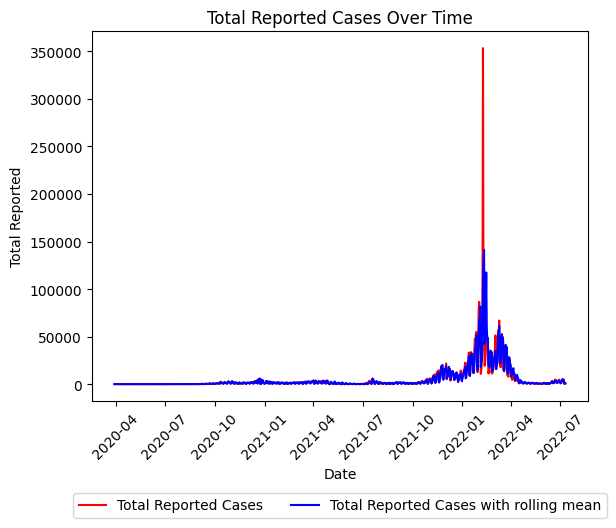

In [378]:
# Aggregate the data by date and calculate the sum of total reported cases
df_reported = df.groupby('Date_measurement')['Total_reported'].sum().reset_index()
df_agg_reported = rolling_mean.groupby('Date_measurement')['Total_reported'].sum().reset_index()

# Create the line plot
sns.lineplot(data=df_reported, x='Date_measurement', y='Total_reported', color='red')
sns.lineplot(data=df_agg_reported, x='Date_measurement', y='Total_reported', color='blue')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Total Reported')
plt.title('Total Reported Cases Over Time')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Create color labels as legend
red_patch = plt.Line2D([], [], color='red', label='Total Reported Cases')
blue_patch = plt.Line2D([], [], color='blue', label='Total Reported Cases with rolling mean')

plt.legend(handles=[red_patch, blue_patch], loc='upper center', bbox_to_anchor=(0.5, -0.23), ncol=3)

# Display the plot
plt.show()

In the graph above we can see the sum of total_reported cases for every municipality over time. Here we can also see that there is a larger peak when not taking the rolling mean of a 7 day window.

In the upcoming graphs we'll continue to compare the rolling mean dataset to the normal dataset to plot various values.

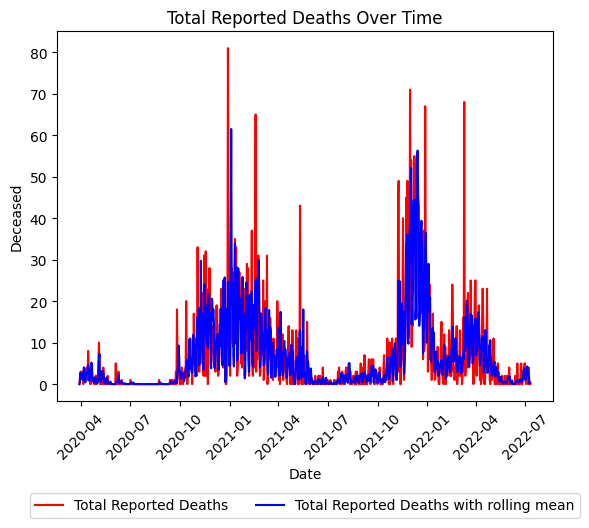

In [379]:
# Aggregate the data by date and calculate the sum of total reported cases
df_deceased = df.groupby('Date_measurement')['Deceased'].sum().reset_index()
df_agg_deceased = rolling_mean.groupby('Date_measurement')['Deceased'].sum().reset_index()

# Create the line plot
sns.lineplot(data=df_deceased, x='Date_measurement', y='Deceased', color='red')
sns.lineplot(data=df_agg_deceased, x='Date_measurement', y='Deceased', color='blue')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Deceased')
plt.title('Total Reported Deaths Over Time')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Create color labels as legend
red_patch = plt.Line2D([], [], color='red', label='Total Reported Deaths')
blue_patch = plt.Line2D([], [], color='blue', label='Total Reported Deaths with rolling mean')

plt.legend(handles=[red_patch, blue_patch], loc='upper center', bbox_to_anchor=(0.5, -0.23), ncol=3)

# Display the plot
plt.show()

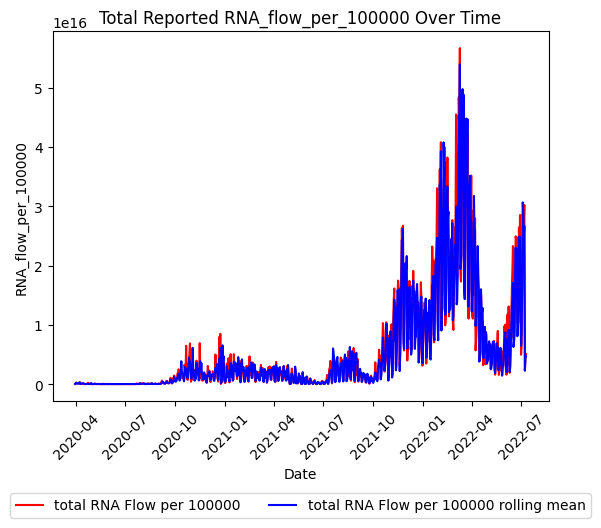

In [380]:


# Aggregate the data by date and calculate the sum of total reported cases
df_rna_flow = df.groupby('Date_measurement')['RNA_flow_per_100000'].sum().reset_index()
df_agg_rna_flow = rolling_mean.groupby('Date_measurement')['RNA_flow_per_100000'].sum().reset_index()

# Create the line plot
sns.lineplot(data=df_rna_flow, x='Date_measurement', y='RNA_flow_per_100000', color='red')
sns.lineplot(data=df_agg_rna_flow, x='Date_measurement', y='RNA_flow_per_100000', color='blue')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('RNA_flow_per_100000')
plt.title('Total Reported RNA_flow_per_100000 Over Time')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Create color labels as legend
red_patch = plt.Line2D([], [], color='red', label='total RNA Flow per 100000')
blue_patch = plt.Line2D([], [], color='blue', label='total RNA Flow per 100000 rolling mean')

plt.legend(handles=[red_patch, blue_patch], loc='upper center', bbox_to_anchor=(0.5, -0.23), ncol=3)

# Display the plot
plt.show()


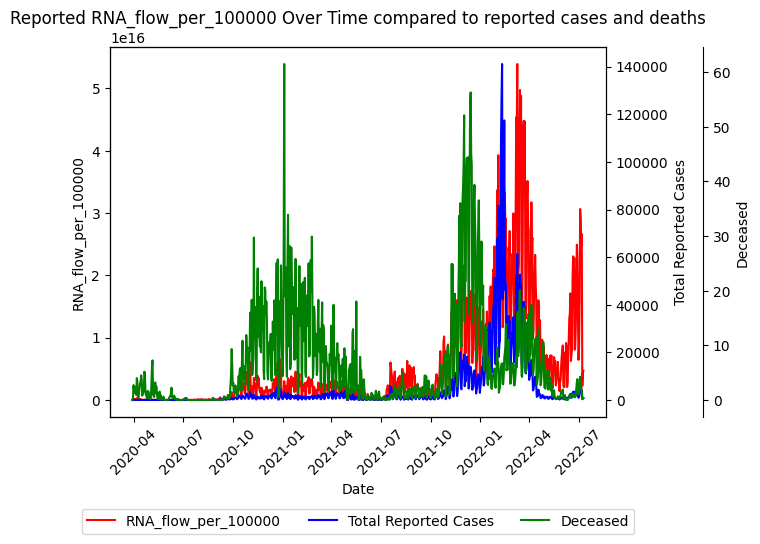

In [381]:
# Create the first y-axis plot
ax1 = sns.lineplot(data=df_agg_rna_flow, x='Date_measurement', y='RNA_flow_per_100000', color='red')
ax1.set_ylabel('RNA_flow_per_100000')

ax2 = ax1.twinx()
# Create the second y-axis plot
sns.lineplot(data=df_agg_reported, x='Date_measurement', ax=ax2, y='Total_reported', color='blue')
ax2.set_ylabel('Total Reported Cases')

# Create the third y-axis plot
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 70))  # Adjust the position of the third y-axis
sns.lineplot(data=df_agg_deceased, x='Date_measurement', y='Deceased', ax=ax2, color='green')
ax2.set_ylabel('Deceased')

# Set labels and title
ax1.set_xlabel('Date')
ax1.set_title('Reported RNA_flow_per_100000 Over Time compared to reported cases and deaths')

# Rotate x-axis labels for all subplots
for ax in [ax1, ax2]:
    ax.tick_params(axis='x', rotation=45)

# Create color labels as legend
red_patch = plt.Line2D([], [], color='red', label='RNA_flow_per_100000')
blue_patch = plt.Line2D([], [], color='blue', label='Total Reported Cases')
green_patch = plt.Line2D([], [], color='green', label='Deceased')

# Add legend below the graph
plt.legend(handles=[red_patch, blue_patch, green_patch], loc='upper center', bbox_to_anchor=(0.5, -0.23), ncol=3)

# Display the plot
plt.show()

There doesn't seem to be a clear correlation between the amount of deceased people and the other two graphs (RNA flow and reported cases) even when taking into account that certain plots can lag behind.

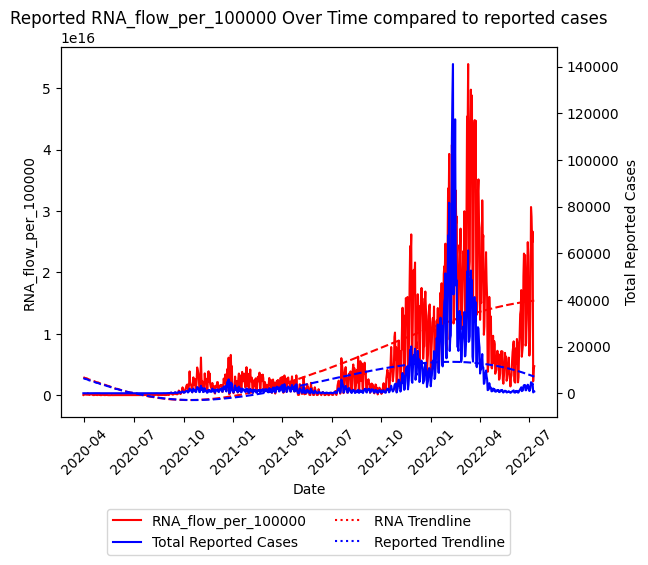

In [382]:
# Create the first y-axis plot
ax1 = sns.lineplot(data=df_agg_rna_flow, x='Date_measurement', y='RNA_flow_per_100000', color='red')
ax1.set_ylabel('RNA_flow_per_100000')

# Create the second y-axis plot
ax2 = ax1.twinx()
sns.lineplot(data=df_agg_reported, x='Date_measurement', y='Total_reported', ax=ax2, color='blue')
ax2.set_ylabel('Total Reported Cases')

# Set labels and title
ax1.set_xlabel('Date')
ax1.set_title('Reported RNA_flow_per_100000 Over Time compared to reported cases')

# Rotate x-axis labels for all subplots
for ax in [ax1, ax2]:
    ax.tick_params(axis='x', rotation=45)

# Fit and plot polynomial trendlines
degree = 3  # Polynomial degree
x = np.arange(len(df_agg_rna_flow))
y1 = df_agg_rna_flow['RNA_flow_per_100000']
y2 = df_agg_reported['Total_reported']

# Fit polynomial trendline for RNA_flow_per_100000
coeffs1 = np.polyfit(x, y1, degree)
poly1 = np.poly1d(coeffs1)
sns.lineplot(data=df_agg_rna_flow, x='Date_measurement', y=poly1(x), ax=ax1, color='red', linestyle='dashed')

# Fit polynomial trendline for Total Reported Cases
coeffs2 = np.polyfit(x, y2, degree)
poly2 = np.poly1d(coeffs2)
sns.lineplot(data=df_agg_reported, x='Date_measurement', y=poly2(x), ax=ax2, color='blue', linestyle='dashed')

# Create color labels as legend
red_patch = plt.Line2D([], [], color='red', label='RNA_flow_per_100000')
blue_patch = plt.Line2D([], [], color='blue', label='Total Reported Cases')
red_dotted = plt.Line2D([], [], color='red', linestyle='dotted', label='RNA Trendline')
blue_dotted = plt.Line2D([], [], color='blue', linestyle='dotted', label='Reported Trendline')

# Add legend below the graph
plt.legend(handles=[red_patch, blue_patch, red_dotted, blue_dotted], loc='upper center', bbox_to_anchor=(0.5, -0.23), ncol=2)

# Display the plot
plt.show()

Looking at both trendlines in the graph above, we can see that they behave similiarly. Some of the peaks in the graph also coincide with each other. We do have to take into account that COVID infected people can still have COVID virus particles in their excrement for a period of time.

C:\Users\Peter\AppData\Local\Temp\ipykernel_8468\1720933880.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


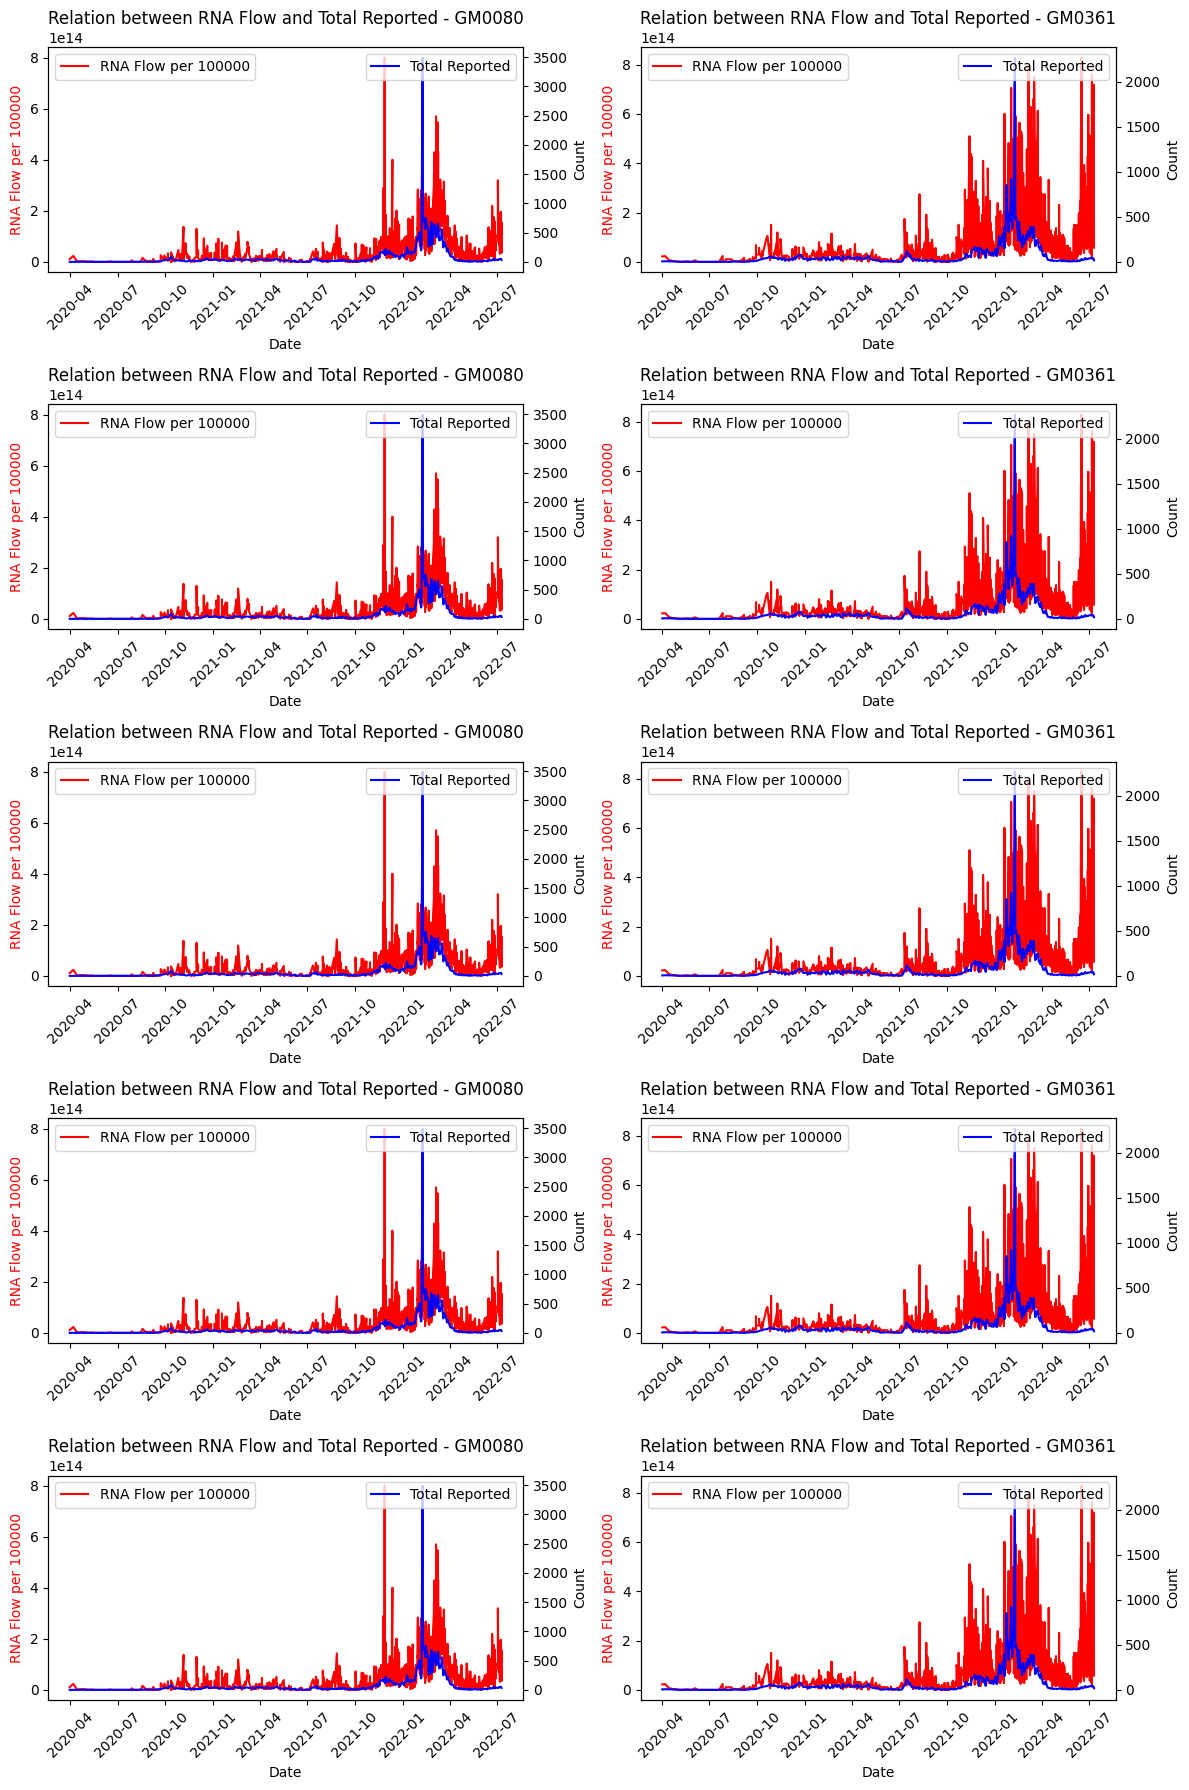

In [383]:
# Get the municipalities
municipalities = df_filtered['Municipality_code']

# Create a figure and subplots with a 2x5 grid
fig, axes = plt.subplots(5, 2, figsize=(12, 18))

# Iterate over the selected municipalities and corresponding subplot axes
for i, (municipality, ax) in enumerate(zip(municipalities, axes.flatten())):
    # Filter the data for the current municipality
    data = df_filtered[df_filtered['Municipality_code'] == municipality]
    
    # Create a secondary y-axis for RNA flow per 100000
    ax2 = ax.twinx()
    
    # Plot RNA flow per 100000 on the primary y-axis (red line)
    ax.plot(data.index, data['RNA_flow_per_100000'], label='RNA Flow per 100000', color='red')
    ax.set_ylabel('RNA Flow per 100000', color='red')
    
    # Plot Total reported on the secondary y-axis (blue line)
    ax2.plot(data.index, data['Total_reported'], label='Total Reported', color='blue')
    ax2.set_ylabel('Count')
    
    # Set labels and title
    ax.set_xlabel('Date')
    ax.set_title(f'Relation between RNA Flow and Total Reported - {municipality}')

    # Rotate the x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
    # Display the legend
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

When looking at the relation between the RNA flow and reported cases per municipality it's sometimes hard to say if there's a correlation when looking at the graphs. In the next chapter we'll take a more statistical approach to the data to see if a correlation really does exist.

## Statistical Analysis <a id="paragraph5"></a>

In this chapter we'll futher analyse the data by looking into how the data is distributed and how data correlates with each other. This will allow us to draw a conclusion.

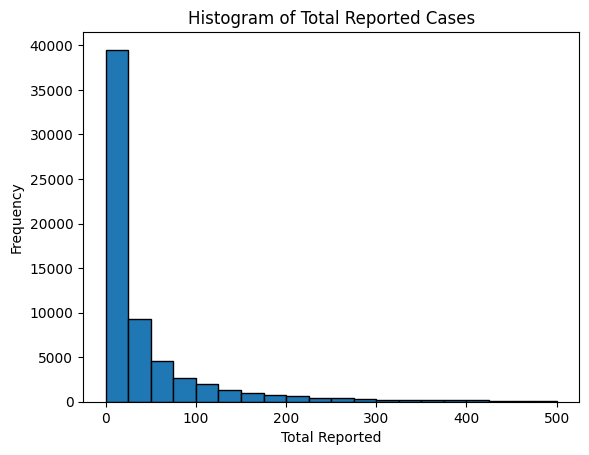

In [384]:
# Create a histogram of total_reported with a range of 0-500
plt.hist(df['Total_reported'], bins=20, range=(0,500), edgecolor='black')

# Set labels and title
plt.xlabel('Total Reported')
plt.ylabel('Frequency')
plt.title('Histogram of Total Reported Cases')

# Display the histogram
plt.show()

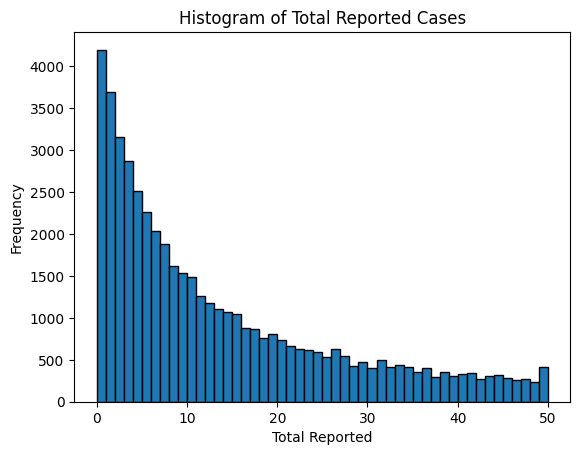

In [385]:
# Create a histogram of total_reported with a range of 0-50
plt.hist(df['Total_reported'], bins=50, range=(0,50), edgecolor='black')

# Set labels and title
plt.xlabel('Total Reported')
plt.ylabel('Frequency')
plt.title('Histogram of Total Reported Cases')

# Display the histogram
plt.show()

In these histograms you can see that values closer to 0 get reported more often, this means that most days there were 0 reported cases. Without putting a range on the histogram it would be hard to see the amount of values between 0 and 100 which got reported the most.

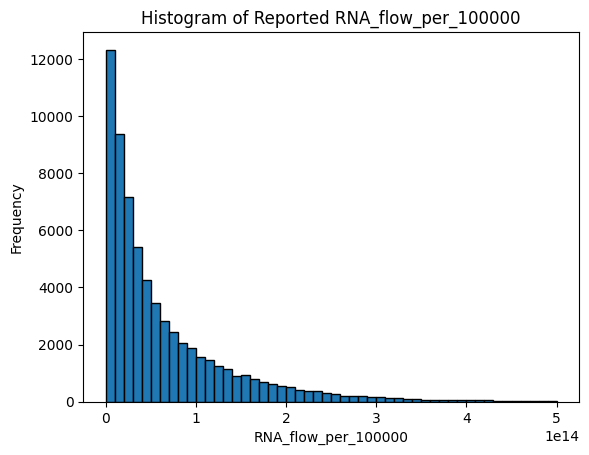

In [386]:
# Create a histogram of RNA_flow_per_100000
plt.hist(df['RNA_flow_per_100000'], bins=50, range=(0,0.5e15), edgecolor='black')

# Set labels and title
plt.xlabel('RNA_flow_per_100000')
plt.ylabel('Frequency')
plt.title('Histogram of Reported RNA_flow_per_100000')

# Display the histogram
plt.show()

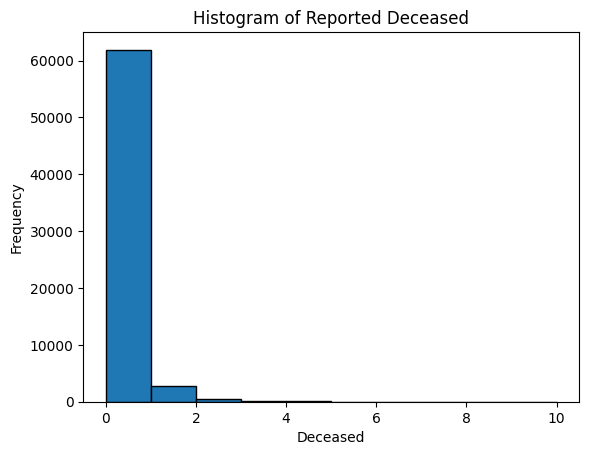

In [387]:
# Create a histogram of deceased
plt.hist(df['Deceased'], bins=10,range=(0,10), edgecolor='black')

# Set labels and title
plt.xlabel('Deceased')
plt.ylabel('Frequency')
plt.title('Histogram of Reported Deceased')

# Display the histogram
plt.show()

Again we can see that most data is right skewed, having a "tail" on the right side of the distribution.

Next up we'll take a look at the boxplots of these variables to get further insight into how the data is distributed.

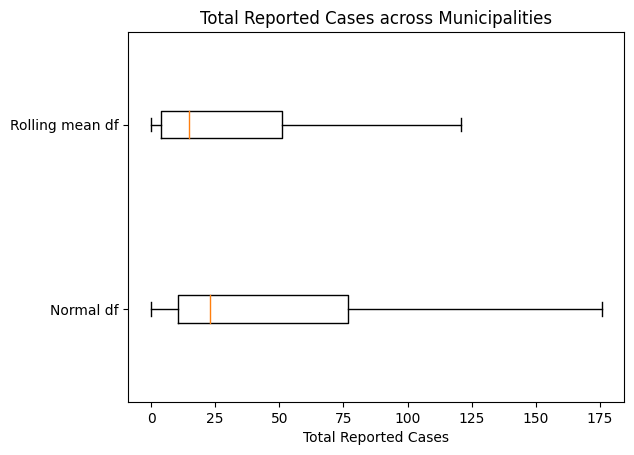

In [388]:
# Create horizontal box plots of total_reported for both the rolling mean and normal dataframe
fig, ax = plt.subplots()

ax.boxplot(rolling_mean['Total_reported'], positions=[1], vert=False, showfliers=False)
ax.boxplot(df['Total_reported'], positions=[2], vert=False, showfliers=False)

ax.set_yticklabels(['Normal df', 'Rolling mean df'])

# Set the labels and title
ax.set_xlabel('Total Reported Cases')
ax.set_title('Total Reported Cases across Municipalities')

# Display the plot
plt.show()

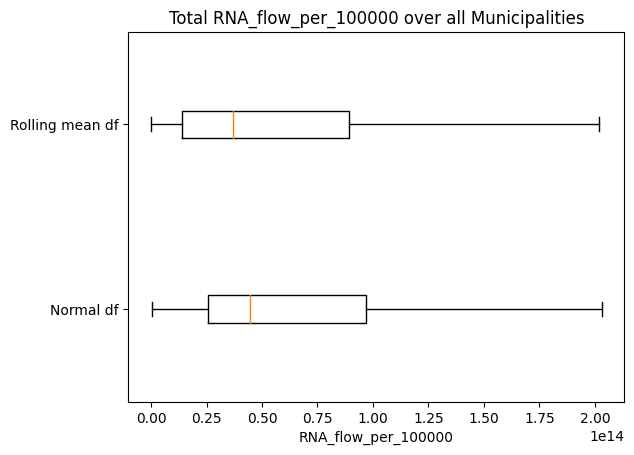

In [389]:
# Create horizontal box plots of RNA_flow_per_100000 for both the rolling mean and normal dataframe
fig, ax = plt.subplots()

ax.boxplot(rolling_mean['RNA_flow_per_100000'], positions=[1], vert=False, showfliers=False)
ax.boxplot(df['RNA_flow_per_100000'], positions=[2], vert=False, showfliers=False)

ax.set_yticklabels(['Normal df', 'Rolling mean df'])

# Set the labels and title
ax.set_xlabel('RNA_flow_per_100000')
ax.set_title('Total RNA_flow_per_100000 over all Municipalities')

# Display the plot
plt.show()

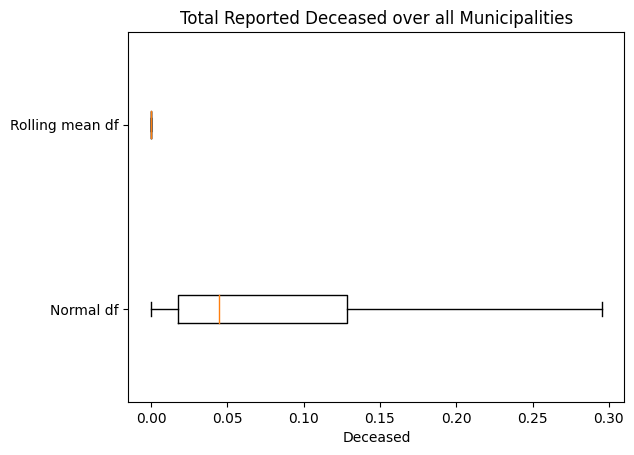

In [390]:
# Create horizontal box plots of Deceased for both the rolling mean and normal dataframe
fig, ax = plt.subplots()

ax.boxplot(rolling_mean['Deceased'], positions=[1], vert=False, showfliers=False)
ax.boxplot(df['Deceased'], positions=[2], vert=False, showfliers=False)

ax.set_yticklabels(['Normal df', 'Rolling mean df'])

# Set the labels and title
ax.set_xlabel('Deceased')
ax.set_title('Total Reported Deceased over all Municipalities')

# Display the plot
plt.show()

The boxplots also tell me that the data is right skewed, even when not displaying the outliers we can see that the quartiles all fall at the left side of the graph while the right whisker extends far to the right. Noteworthy is how the deceased variable is very insignificant when looking at the rolling mean compared to the unaltered version.

In the graph below we take a look at the boxplots for the total reported cases when just looking at the ten municipalities with the most data entries.

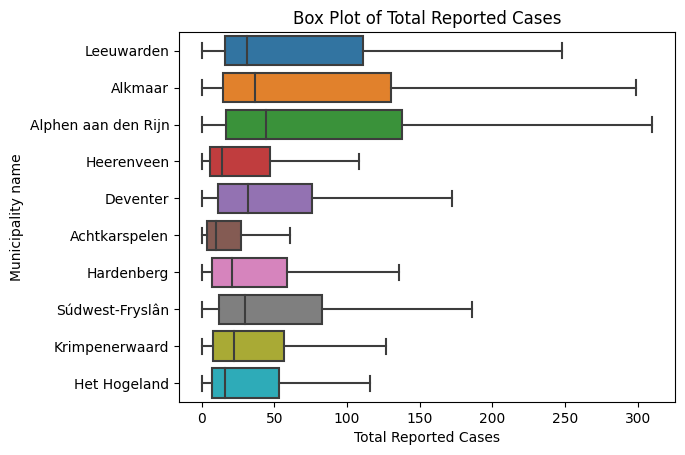

In [391]:
# Create a box plot for the "Total_reported" column for the dataframe with top ten municipalities
sns.boxplot(data=df_filtered, x="Total_reported", y="Municipality_name", showfliers = False)

# Set plot title and labels
plt.title('Box Plot of Total Reported Cases')
plt.xlabel('Total Reported Cases')
plt.ylabel('Municipality name')

# Display the plot
plt.show()

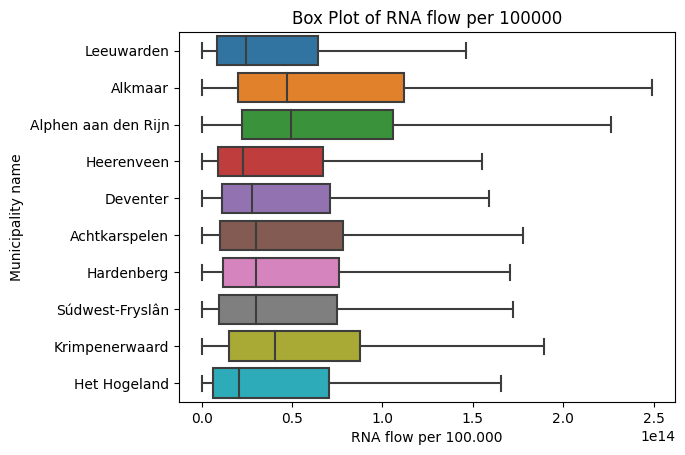

In [392]:
# Create a box plot for the "RNA_flow_per_100000" column for the dataframe with top ten municipalities
sns.boxplot(data=df_filtered, x="RNA_flow_per_100000", y="Municipality_name", showfliers = False)

# Set plot title and labels
plt.title('Box Plot of RNA flow per 100000')
plt.xlabel('RNA flow per 100.000')
plt.ylabel('Municipality name')

# Display the plot
plt.show()

Each municipality has a slighly different distribution for it's variables. This is not suprising. It would be interesting to know where this difference comes from. E.g. population size per municipality, amount of visiting tourists, etc. This is however outside of the scope of this project and would require even more data sets.

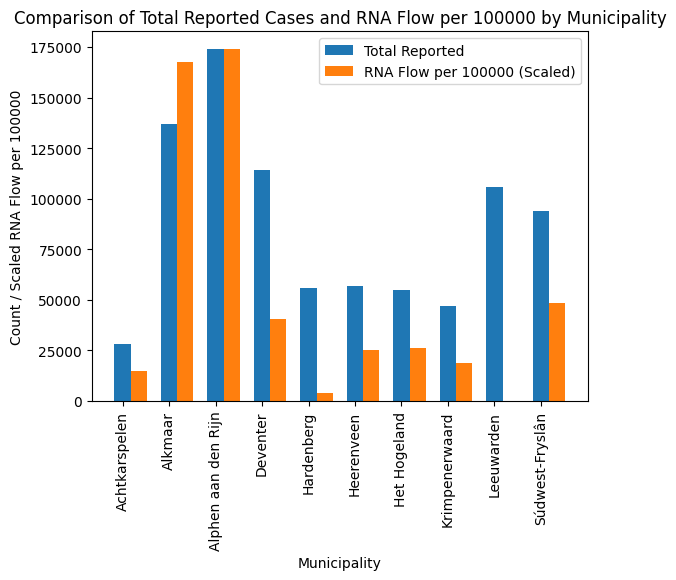

In [393]:
from sklearn.preprocessing import MinMaxScaler

# Group the data by 'Municipality_name' and calculate the sum of each variable for each municipality
grouped_df = df_filtered.groupby('Municipality_name')[['Total_reported', 'RNA_flow_per_100000']].sum().reset_index()

# Scale the values of 'RNA_flow_per_100000' to be on the same scale as 'Total_reported'
scaler = MinMaxScaler(feature_range=(0, max(grouped_df['Total_reported'])))
grouped_df['RNA_flow_scaled'] = scaler.fit_transform(grouped_df[['RNA_flow_per_100000']])

# Set the width of each bar
bar_width = 0.35

# Create an array of indices for each municipality
indices = range(len(grouped_df))

# Create the first bar plot for 'Total_reported'
plt.bar(indices, grouped_df['Total_reported'], width=bar_width, label='Total Reported')

# Create the second bar plot for 'RNA_flow_scaled'
plt.bar([i + bar_width for i in indices], grouped_df['RNA_flow_scaled'], width=bar_width, label='RNA Flow per 100000 (Scaled)')

# Set the x-axis tick labels as municipality names
plt.xticks(indices, grouped_df['Municipality_name'])

# Set plot title and labels
plt.title('Comparison of Total Reported Cases and RNA Flow per 100000 by Municipality')
plt.xlabel('Municipality')
plt.ylabel('Count / Scaled RNA Flow per 100000')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend
plt.legend()

# Display the plot
plt.show()


In the barplot above I use MinMaxScaler to scale the RNA flow data to the total reported cases data to compare the two (since they have widely differing value ranges). The purpose is to bring the values of different columns to a comparable range for visualization or analysis. I've chosen to use the MinMaxScaler here since it will preserve the shape of the dataset (no distortion). It's hard to draw a conclusion from the bar plot above. 

It's time to take a look at the correlation between the two variables.

In [394]:
# Filter the relevant columns
filtered_df = df[['Municipality_name', 'RNA_flow_per_100000', 'Total_reported']]

# Calculate the correlation for each municipality
correlation_per_municipality = filtered_df.groupby('Municipality_name')[['Total_reported', 'RNA_flow_per_100000']].corr().unstack()['Total_reported']['RNA_flow_per_100000']

# Calculate the correlation for all municipalities
correlation_all_municipalities = filtered_df['Total_reported'].corr(filtered_df['RNA_flow_per_100000'])

# Create a new dataframe for correlation results
correlation_df = pd.DataFrame({'Correlation': correlation_per_municipality})

# Add the correlation for all municipalities to the dataframe
correlation_df.loc['All Municipalities', 'Correlation'] = correlation_all_municipalities

# Sort the correlation_df descending
correlation_df.sort_values(by='Correlation',inplace=True, ascending=False)

# Display the correlation dataframe and print the mean correlation value
mean_correlation = correlation_df.mean().values[0]

print("The mean correlation over all municipalities is:", mean_correlation.round(2))
correlation_df


The mean correlation over all municipalities is: 0.43


,Correlation
Municipality_name,
Beek,0.724660
Asten,0.679956
Heemstede,0.674343
Westerkwartier,0.662405
Landsmeer,0.652510
...,...
Edam-Volendam,0.177657
Ede,0.171667
Noord-Beveland,0.171240


With the correlation value now calculated for each municipality we can now make a final graph to display the correlation value for each municipality.

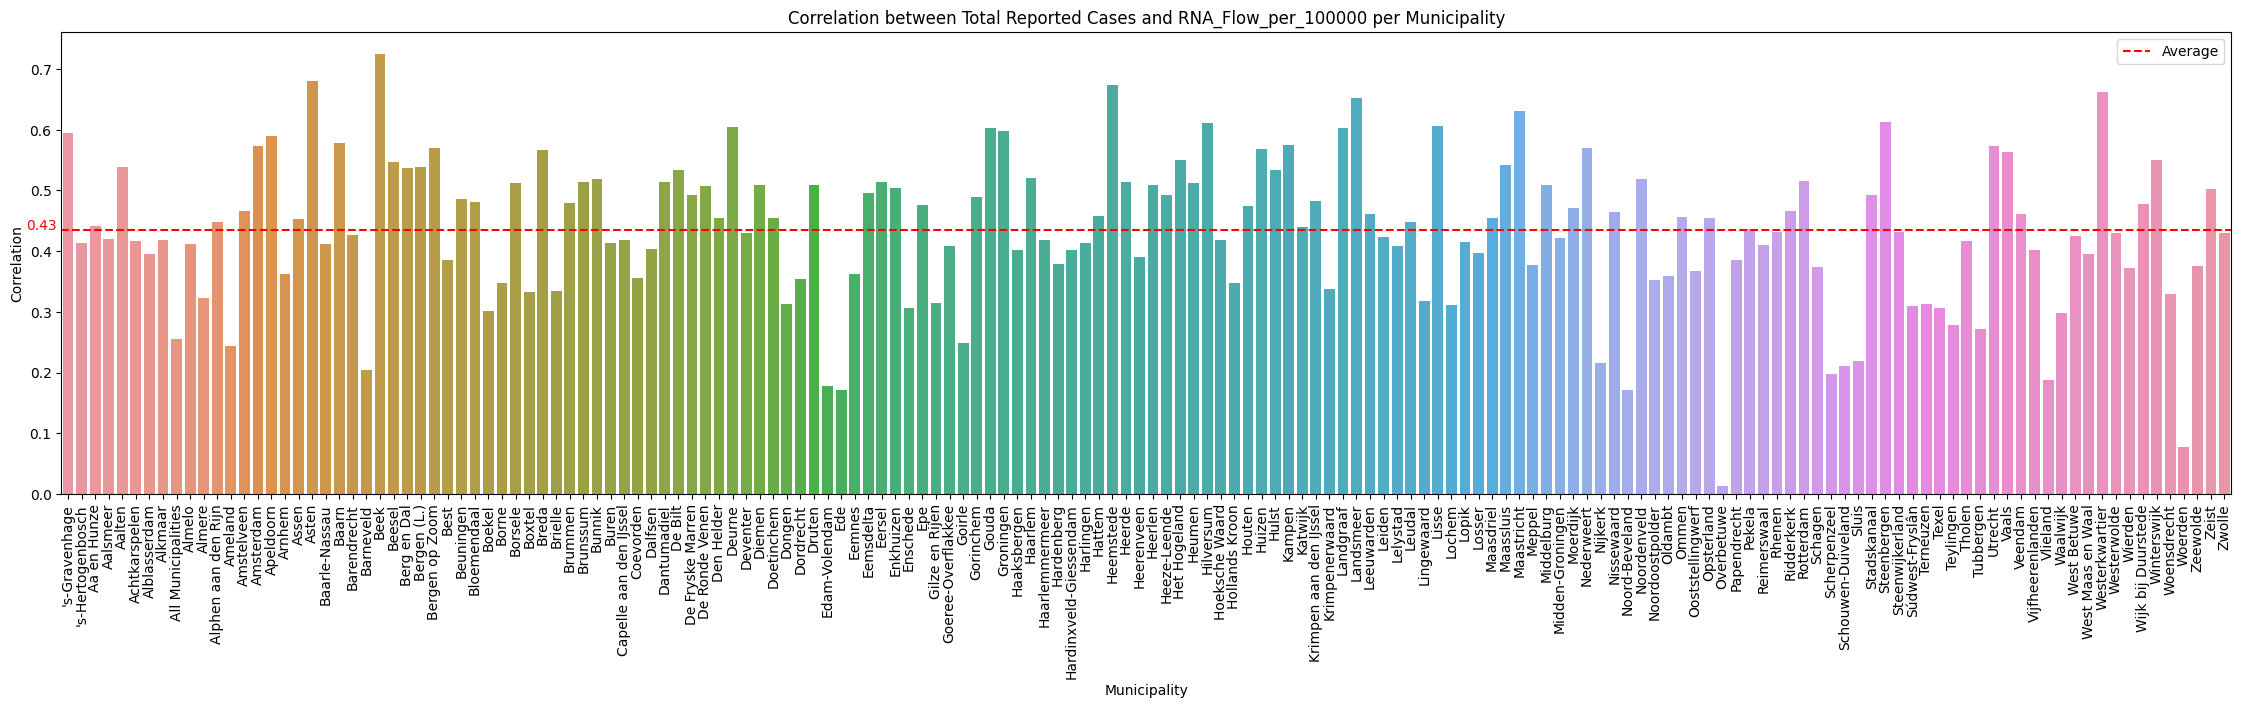

In [395]:
# Group the data by 'Municipality_name' and calculate the sum of 'Total_reported' for each municipality
grouped_df = correlation_df.groupby('Municipality_name')['Correlation'].sum().reset_index()

# Create a bar plot using seaborn
plt.figure(figsize=(28, 6))
sns.barplot(data=grouped_df, x='Municipality_name', y='Correlation')

# Plot the average line
plt.axhline(y=mean_correlation, color='r', linestyle='--', label='Average')

# Plot the average value as a separate point on the y-axis
plt.annotate(f'{mean_correlation:.2f}', xy=(0, mean_correlation), xytext=(-30, 0),
             textcoords='offset points', color='red')

# Set plot title and labels
plt.title('Correlation between Total Reported Cases and RNA_Flow_per_100000 per Municipality')
plt.xlabel('Municipality')
plt.ylabel('Correlation')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a legend
plt.legend()

# Display the plot
plt.show()

## Conclusion <a id="paragraph6"></a>

To statistically analyse the data, I first start by making histograms of the variables I am most interested in (reported, RNA flow, and deceased). By examining the shape, central tendency, and spread of the histogram, I can gain insights into the overall distribution pattern of the data. Looking at the histogram helps us identify outliers and skewness. Using the range and bin parameters helps us best showcase where the most data points are situated on the x axis.

I’ve also used boxplots to complement the histograms, since they provide a concise summary of the distribution of data and highlight key statistical measures like the median and quartiles while making use of the interquartile range (IQR).

To conclude the statistical analysis, I use bar plots to see how the total reported cases and RNA flow are distributed for the ten municipalities with the most data entries. These bar charts are then compared to each other to see if the total RNA flow value coincides with the total number of reported cases. After this, I use bar plots to showcase the correlation between the variables I am most interested in. The correlation between reported cases and RNA flow was calculated per municipality using Pandas’ correlation function using the Pearson correlation coefficient. This allows me to draw a final conclusion and answer the research question.
